<h2><b>Predicción de publicaciones científicas UFRO</b><h2>

<h4>Las publicaciones de la Universidad de La Frontera han crecido considerablemente en sus indizaciones en bases de datos bibliográficas, siendo las más reconocidas a nivel nacional WoS, Scopus y SciELO. Estas han aumentado sus registros año tras año y cerca de la mitad están disponibles para libre descarga y otros deben ser suscritos para ser visualizados, lo que en ocasiones al no existir un repositorio obliga un doble pago del artículo, al momento de financiar y al de suscribir la revista.<br>
 
El presente trabajo tiene por objetivo demostrar la necesidad de resguardar el patrimonio científico de la institución en una plataforma única, esto por el alto crecimiento de las publicaciones en las cuales han colaborados investigadores de la UFRO, y la necesidad de unificar estos registros en una plataforma idónea que interopere con otras plataformas, repositorios o bases de datos bibliográficas, influyendo de manera favorable en el impacto de la producción científica de la UFRO a nivel mundial, para ello se ha realizado una predicción del crecimiento de publicaciones científicas. 

Se hizo un levantamiento de datasets gracias a las Unidades: Dirección de Investigación y la Dirección de Análisis y Desarrollo Institucional.<br>
Tambien se exploró dentro de las bases de datos de WoS, Scopus y SciELO, las publicaciones asociadas a la UFRO.<br> En esta predicción de datos se eligió el modelo de regresión lineal múltiple <code>'LinearRegression'</code> y se procesarán los datos en este cuaderno jupyter notebook de python.
<h4>

In [1]:
# importamos las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# importamos el dataset 'UFRO_2000_2022.csv'
df = pd.read_csv('UFRO_2000_2022.csv')
print('Tabla del total de publicaciones cientificas de la UFRO desde 2000 hasta 2022')
df

Tabla del total de publicaciones cientificas de la UFRO desde 2000 hasta 2022


,Ano,WoS,WoS OA,Scopus,Scopus OA,SciELO,Total
0,2000,51,4.0,40.0,6.0,0.0,101
1,2001,43,9.0,36.0,3.0,0.0,91
2,2002,72,7.0,56.0,4.0,0.0,139
3,2003,58,5.0,60.0,7.0,0.0,130
4,2004,57,8.0,54.0,7.0,0.0,126
5,2005,69,8.0,69.0,10.0,0.0,156
6,2006,70,6.0,85.0,9.0,0.0,170
7,2007,96,13.0,121.0,19.0,0.0,249
8,2008,139,32.0,160.0,31.0,87.0,449
9,2009,167,59.0,213.0,41.0,98.0,578


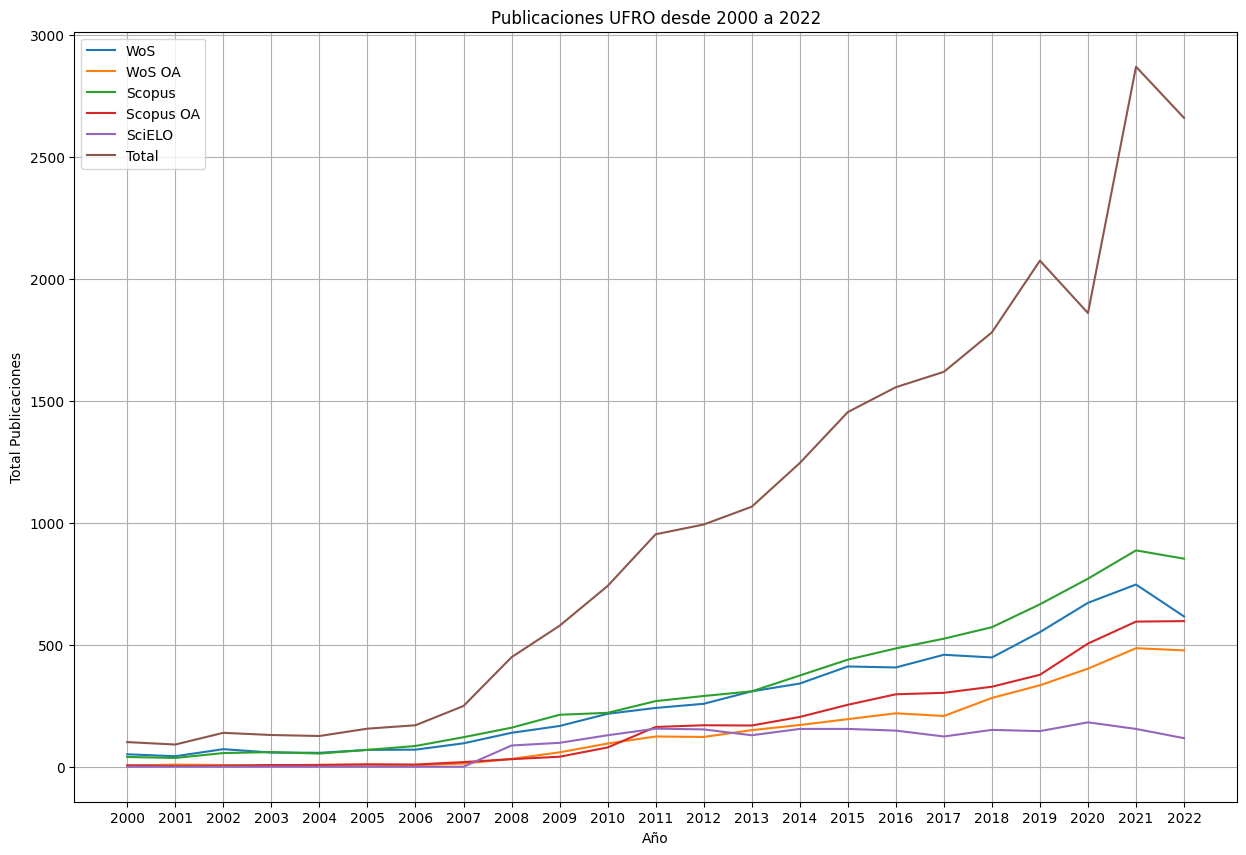

In [3]:
#graficar las columnas WoS, WoS OA, Scopus, Scopus OA, SciELO, Total
plt.figure(figsize=(15,10))
plt.xlabel('Año')
plt.ylabel('Total Publicaciones')
plt.title('Publicaciones UFRO desde 2000 a 2022')
plt.plot(df['Ano'], df['WoS'], label='WoS')
plt.plot(df['Ano'], df['WoS OA'], label='WoS OA')
plt.plot(df['Ano'], df['Scopus'], label='Scopus')
plt.plot(df['Ano'], df['Scopus OA'], label='Scopus OA')
plt.plot(df['Ano'], df['SciELO'], label='SciELO')
plt.plot(df['Ano'], df['Total'], label='Total')
plt.xticks(np.arange(2000, 2023, 1))
plt.legend()
plt.grid(True)
plt.show()



<h5>Las publicaciones científicas desde el 2000 hasta el 2022, muestran una tendencia que aumenta a través de los años.<br>
En el gráfico anterior se muestra esta alza.
<h5>

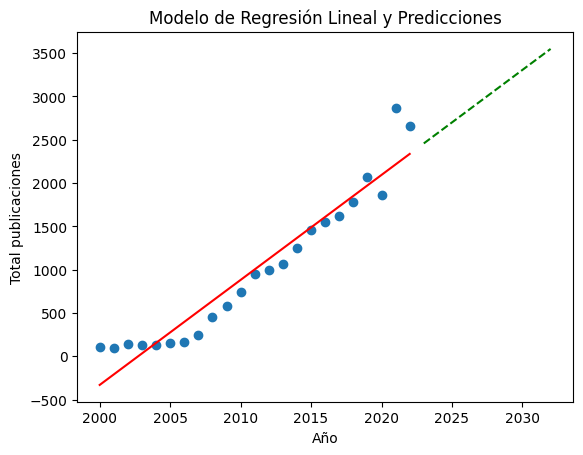

In [4]:
# Extraer las variables independiente (x) y dependiente (y)
x = np.array(df['Ano']).reshape(-1, 1)
y = np.array(df['Total'])

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)

# Hacer la predicción para los años 2023 a 2033
pred_x = np.array(range(2023, 2033)).reshape(-1, 1)
pred_y = model.predict(pred_x)

# Graficar los datos, la línea de regresión y las predicciones
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.plot(pred_x, pred_y, linestyle='--', color='green')
plt.xlabel('Año')
plt.ylabel('Total publicaciones')
plt.title('Modelo de Regresión Lineal y Predicciones')
plt.show()

In [5]:
# predicción para los años de 2023 a 2033 para cada columna
models = {}
for column in ['WoS', 'WoS OA', 'Scopus', 'Scopus OA', 'SciELO', 'Total']:
    X_train = df['Ano'].values.reshape(-1, 1)
    y_train = df[column].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)

    models[column] = model

# predicción para los años de 2023 a 2033 para cada columna
X_test = np.array([range(2023,2033)]).reshape(-1, 1)
resultados = pd.DataFrame({'Ano': range(2023, 2033)})
for column in models.keys():
    y_pred = models[column].predict(X_test)
    resultados[column] = y_pred.reshape(-1)

In [6]:
# pasar a valores enteros los resultaados de la predicción según cada columna
resultados = resultados.astype(int)
resultados

,Ano,WoS,WoS OA,Scopus,Scopus OA,SciELO,Total
0,2023,656,405,794,503,198,2457
1,2024,688,427,832,530,207,2579
2,2025,719,448,871,557,216,2700
3,2026,750,470,910,583,225,2821
4,2027,781,491,949,610,234,2942
5,2028,812,512,988,637,243,3064
6,2029,843,534,1027,664,252,3185
7,2030,875,555,1065,691,261,3306
8,2031,906,577,1104,718,270,3427
9,2032,937,598,1143,744,279,3549


c:\Users\Ufro\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Users\Ufro\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


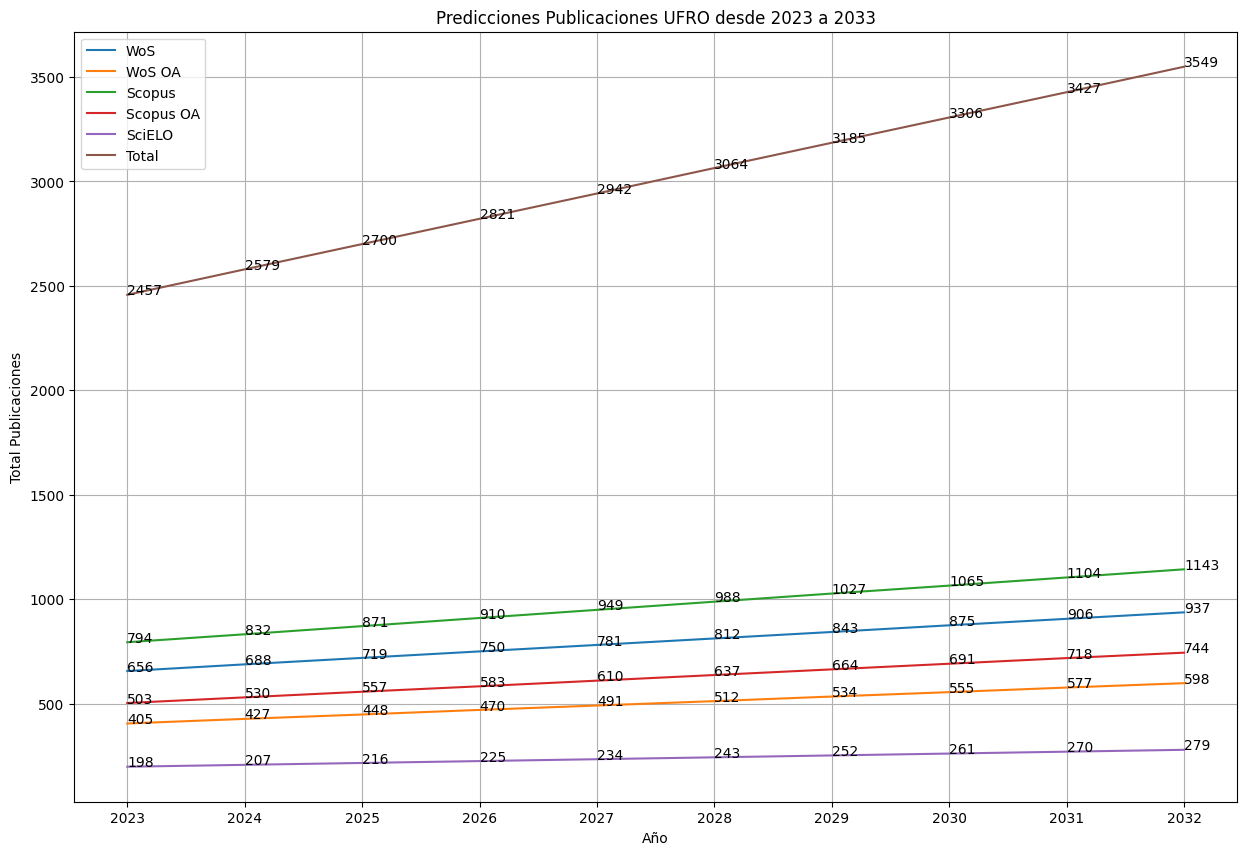

In [7]:
# graficar resultados
plt.figure(figsize=(15,10))
plt.xlabel('Año')
plt.ylabel('Total Publicaciones')
plt.title('Predicciones Publicaciones UFRO desde 2023 a 2033')
plt.plot(resultados['Ano'], resultados['WoS'], label='WoS')
plt.plot(resultados['Ano'], resultados['WoS OA'], label='WoS OA')
plt.plot(resultados['Ano'], resultados['Scopus'], label='Scopus')
plt.plot(resultados['Ano'], resultados['Scopus OA'], label='Scopus OA')
plt.plot(resultados['Ano'], resultados['SciELO'], label='SciELO')
plt.plot(resultados['Ano'], resultados['Total'], label='Total')
# mostar los resultados en el gráfico
for i in range(2023, 2033):
    plt.text(i, resultados[resultados['Ano'] == i]['WoS'], str(resultados[resultados['Ano'] == i]['WoS'].values[0]))
    plt.text(i, resultados[resultados['Ano'] == i]['WoS OA'], str(resultados[resultados['Ano'] == i]['WoS OA'].values[0]))
    plt.text(i, resultados[resultados['Ano'] == i]['Scopus'], str(resultados[resultados['Ano'] == i]['Scopus'].values[0]))
    plt.text(i, resultados[resultados['Ano'] == i]['Scopus OA'], str(resultados[resultados['Ano'] == i]['Scopus OA'].values[0]))
    plt.text(i, resultados[resultados['Ano'] == i]['SciELO'], str(resultados[resultados['Ano'] == i]['SciELO'].values[0]))
    plt.text(i, resultados[resultados['Ano'] == i]['Total'], str(resultados[resultados['Ano'] == i]['Total'].values[0]))

plt.xticks(np.arange(2023, 2033, 1))
plt.legend()
plt.grid(True)
plt.show()


<h3><b>Concluciones</b><h3>
<h4>La predicción de datos para los años 2023-2032 sigue la misma tendencia entre el 2000 y el 2022 por lo que las publicaciones aumentarán en 121 (resultado de la predicción) anualmente. La implementación de un repositorio institucional dedicado a resguardar el patrimonio científico permitiría facilitar la interoperabilidad con otras bases de datos bibliográficas para la búsqueda y recuperación de información y además aumentar la visualización de registros que no sólo estén indizados en estas tres plataformas más 
utilizadas.<br>

En relación a lo descrito, surge la necesidad de realizar distintas propuestas de estrategias para:<br>

•   Desarrollar capacidades en la comunidad científica para ayudar a posicionar sus publicaciones desde previo el envío del documento hasta su publicación en versión final.

•	Asesorar en los modelos de publicación en Acceso Abierto (Verde, Dorado y Diamante).

•	Potenciar la infraestructura tecnológica que promueva la interoperabilidad con bases de datos de alto impacto como Google Scholar y ANID.

•	Impactar en la generación de Recursos Educativos Abiertos (productos desarrollados con fines educativos durante un proyecto) y planes de Gestión de Datos (documentos exigidos por ANID y editoriales para publicar la investigación).
<h4>